In [2]:
from IPython.display import clear_output

# Оглавление

# 1 Общая идея

## 1.1 Why Should I Trust You?

Машинное обучение лежит в основе многих последних достижений в области науки и технологии.

Когда компьютеры победили профессионалов в таких играх, как Go, многие люди начали спрашивать: могут ли машины стать лучшими водителями или даже лучшими врачами?

Во многих приложениях машинного обучения пользователей просят доверять модели, которая поможет им принимать решения. Врач определенно не станет оперировать пациента просто потому, что «так сказала модель».

Даже в ситуациях с более низкими ставками, например, при выборе фильма для просмотра в Netflix, требуется определенная степень доверия, прежде чем мы откажемся от часов нашего времени на основе модели.

Несмотря на то, что многие модели машинного обучения представляют собой черные ящики, понимание причин, лежащих в основе прогнозов модели, безусловно, поможет пользователям решить, когда им доверять, а когда нет.

У сожалению, компьютеры обычно не объясняют своих прогнозов. 
И это становится препятствием для внедрения моделей машинного обучения.
А если пользователи не доверяют модели или прогнозу, то они будут с опаской использовать их на практике.

Поэтому вопрос в том, как помочь пользователям доверять результатам, полученным с помощью моделей машинного или глубокого обучения.

Важно различать два разных (но связанных) определения доверия: 
1. Доверие к предсказанию, то есть доверяет ли пользователь отдельному предсказанию на столько, чтобы предпринять какие-то действия на его основе?
2. Доверие к модели, то есть, доверяет ли пользователь модели так, чтобы применять их на практике?

Оба напрямую подвержены влиянию того, на сколько человек понимает поведение модели, чтобы не рассматривать ее как черный ящик. 

Определение доверия к индивидуальным прогнозам является важной задачей, когда модель используется для принятия решений. Ведь, например, при медицинской диагностики или обнаружению террористов, предсказания не могут быть выполнены бездумно, так как последствия могут быть катастрофическими.

Помимо доверия индивидуальным предсказаниям, необходимо доверять модели "в целом". Чтобы принять это решение, пользователи должны быть уверенычто модель будет хорошо работать на реальных данных, согласно интересующим метрикам. Реальные данные часто значительно отличаются, ик, роме того, метрика оценки может не указывать на цель продукта. Изучение индивидуальных прогнозов и их объяснения - важная задача, которая может помочь пользователям, особенно для больших наборов данных.

<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/impact_assessment.png" alt="alttext" width=700/> 

Практики часто переоценивают точность своих моделей, тому пример, известный случай с моделью, обученной отличать хаски от волка.

Часто артефакты сбора данных могут вызвать нежелательные корреляции, которые классификаторы улавливают во время обучения. Эти проблемы может быть очень трудно определить, просто взглянув на необработанные данные и прогнозы.

Пример идеально решенной задачи, не применимой к практике - задача различить на фотографиях волков и эскимосских собак (хаски). Исследователи обучили классификатор логистической регрессии из 20 изображений, отобранный вручную так, чтобы на всех фотографиях волков фоном был снег, а на фотографиях хаски - нет.

Этот эксперимент демонстрирует полезность объяснения отдельных визуальных признаков, для понимания работы классификаторов. Перед тем, как принять решения о доверии к ним.


<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/2_bad_models_prediction.png" alt="alttext" width=700/>


#### Критерии, которым должны отвечать Интерпретаторы

1. Результат должен быть интерпретируемым, т. е. обеспечивать качественное понимание взаимосвязи между входными переменными и ответом. Отметим, что интерпретируемость должна учитывать ограничения пользователя. Объяснения должны быть легкими для понимания,не обязательно соответствовать функциям, используемым моделью. Ну и конечно, понятие интерпретируемости зависит от целевой аудитории.

Например, возможное интерпретируемое представление для классификации текста - это двоичный вектор, обозначающий наличие или отсутствие слова. Даже если классификатор может использовать более сложные (и непонятные) функции, такие как вложения слов. Аналогичным образом для классификации изображений, интерпретируемое представление может быть двоичным вектором, указывающим «наличие» или «отсутствие» смежного участка аналогичных пикселей (суперпиксель), тогда как классификатор может представлять изображение в виде тензора с тремя цветовыми каналами на пиксель.

2. Еще один важный критерий - локальная точность. Чтобы иметь смысл, обьяснение должно соответствовать тому, как модель ведет себя конкретно для предсказываемого случая.

Отметим, что локальная точность не подразумевает глобальной точности: факторы, которые важны в глобальном масштабе, могут не иметь значения на местном контексте, и наоборот. 
В то время как глобальная точность не всегда будет означать локальную, выделяя глобально достоверные объяснения, сложных моделей, которые сложно интерпретировать для конкретного примера.

<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/3_1_structure.png" alt="alttext"/>

Описание схемы...


Метрики, например, accuracy, **часто может быть неподходящей метрикой для оценки модели**. Например, когда речь идет о несбалансированных датасетах.

**Другой пример:**

модель прогнозирования оттока клиентов: модель может сказать вам, что конкретный клиент с вероятностью 90% откажется от услуг, но без четкого понимания почему, не ясно, что можно сделать, чтобы предотвратить отток.

Самая точная модель в мире бесполезна, если она не используется для принятия решений и действий.

Поэтому крайне важно сделать модель максимально прозрачной и понятной для заинтересованных сторон, чтобы ее можно было использовать и действовать соответствующим образом.

## 1.2 Пример анализа влияния данных на результаты модели (Kaggle)

Мы рассмотрели примеры того, как можно самостоятельно, используя разлдичные базовые библиотеки, интерпретировать результаты моделей.

Далее, рассмотрим, библиотеки, которые позволяют интепретировать модель более наглядно.

За исключением простых линейных моделей, таких как линейная регрессия, где вы можете легко посмотреть на коэффициенты признаков, модели машинного обучения часто могут быть чем-то вроде черного ящика.

Может быть очень сложно понять, почему модель предсказывает конкретный результат, или убедиться, что результат имеет интуитивный смысл.

# 2 Библиотеки для реализации explanation

Мы рассмотрим две библиотеки: SHAP и LIME.

Логика работы **SHAP (SHapley Additive exPlanations)** основана на значении Шепли.
Значение Шепли - это среднее значение предельных вкладов по всем перестановкам.

SHAP учитыват все возможные перестановки, таким образом, SHAP представляет собой единый подход, обеспечивающий глобальную и локальную согласованность и интерпретируемость.

Однако его цена - время, так как алгоритму нужно вычислить все перестановки, чтобы получить результаты.

Напротив, **LIME (Local Interpretable Model-agnostic Explanations)**, строит дискретные линейные модели вокруг индивидуального прогноза в его локальной окрестности. LIME на самом деле является подмножеством SHAP, но не имеет тех же свойств.

Преимущество LIME - скорость.
Алгоритм LIME изменяет данные вокруг отдельного прогноза для построения модели, в то время как SHAP должен вычислять все перестановки глобально, чтобы получить локальную точность. Кроме того, модуль SHAP Python, пока еще не имеет специально оптимизированных алгоритмов для всех типов алгоритмов (таких как KNN).

## 2.1 [SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html)

<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/4_shap_diagram.png" alt="alttext"/>

Цель SHAP - объяснить предсказание экземпляра x путем вычисления вклада каждой функции в предсказание. Для этого вычисляются значения Шепли из теории игр.А значения признаков экземпляра данных действуют как игроки в коалиции.

Значения Шепли говорят нам, как справедливо распределить «выплату» (= прогноз) между функциями. 
* Игрок может иметь индивидуальное значение функции, например для табличных данных. 
* Или может быть группой значений характеристик. Например, для объяснения изображения пиксели могут быть сгруппированы в суперпиксели, а прогноз распределяется между ними.

SHAP определяет объяснение как:

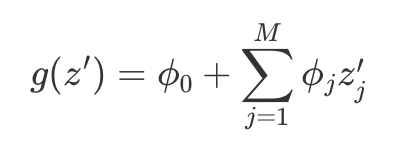



где g - модель объяснения
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>z</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>&#x2208;<!-- ∈ --></mo>
  <mo fence="false" stretchy="false">{</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mn>1</mn>
  <msup>
    <mo fence="false" stretchy="false">}</mo>
    <mi>M</mi>
  </msup>
</math> - вектор коалиции, M - максимальный размер коалиции и
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x03D5;<!-- ϕ --></mi>
    <mi>j</mi>
  </msub>
  <mo>&#x2208;<!-- ∈ --></mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="double-struck">R</mi>
  </mrow>
</math> - атрибуция признака j, значения Шепли.

Таким образом, например, изображения не представлены на уровне пикселей, а агрегируются в суперпиксели.

Вы можете найти эту формулу в обьячнении [Shapley value ](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley)

Прогноз может быть объяснен, если предположить, что каждое значение признака экземпляра является «игроком» в игре, где прогноз является выплатой.

Критерий Шепли говоирт нам, как справедливо распределить «выплату» между функциями.

Предположим следующий сценарий:

Вы обучили модель машинного обучения прогнозированию цен на квартиры. Для одной квартиры он прогнозирует 300 000 евро, и вам необходимо объяснить этот прогноз. Квартира площадью 50 м2, находится на 2 этаже, рядом парк и кошкам запрещено:

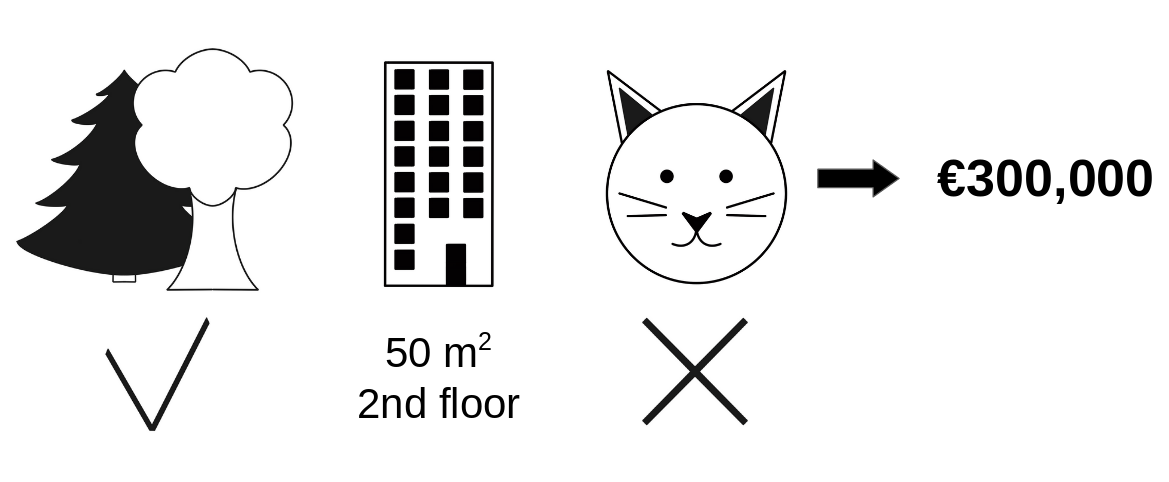

Наша цель - объяснить, как каждое из значений этих характеристик повлияло на прогноз.

Ответ прост для моделей линейной регрессии: эффект каждой функции - это вес функции, умноженный на ее значение. Но это работает только из-за линейности модели.

Для более сложных моделей нам понадобится другое решение.

Такое решение исходит из теории кооперативных игр: значение Шепли, введенное Шепли (1953), представляет собой метод назначения выплат игрокам в зависимости от их вклада в общую выплату. Игроки сотрудничают в коалиции и получают от этого сотрудничества определенную прибыль.


Для каждой из этих коалиций мы вычисляем прогнозируемую цену квартиры и берем разницу, чтобы получить маржинальный вклад.

Значение Шепли представляет собой (взвешенное) среднее значение маржинальных взносов.

Мы заменяем значения признаков, которые не входят в группу, случайными значениями признаков из набора данных квартиры, чтобы получить прогноз на основе модели машинного обучения.

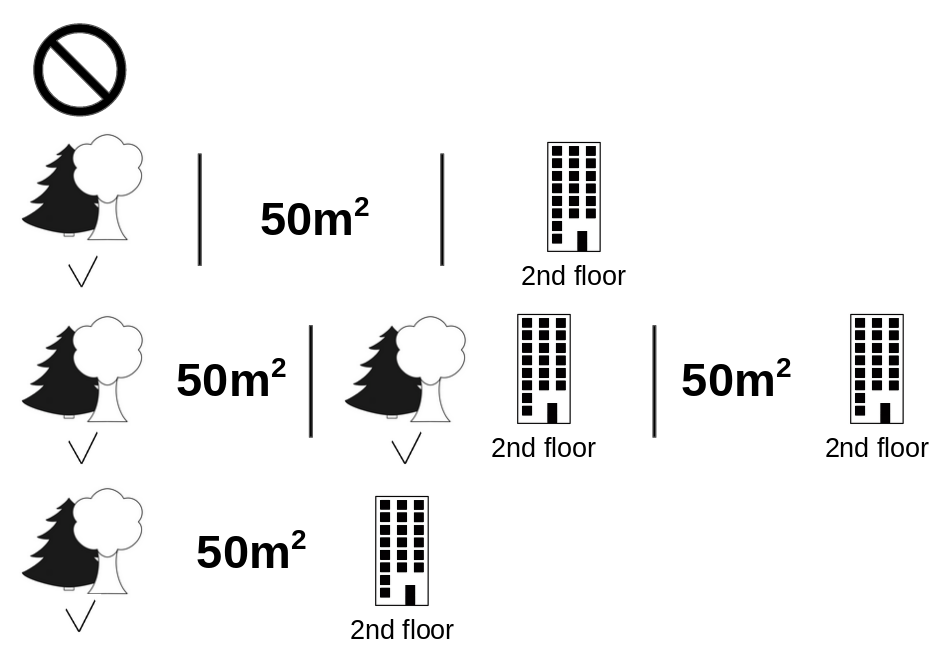

Посмотрим, как реализуется этот подход в NLP

In [10]:
!pip install shap
clear_output()

In [11]:
import numpy as np
import torch
import shap

#### Пример обьяснения перевода с английского на русский
Рассмотрим пример интерпретации модели для предварительно обученной модели машинного перевода
[Machine Translation Example](https://shap.readthedocs.io/en/stable/example_notebooks/text_examples/translation/Machine%20Translation%20Explanation%20Demo.html). И, раз уж мы будем для перевода использовать предобученную модель - транформер, то переведем начало статьи [How Transformers Work](https://towardsdatascience.com/transformers-141e32e69591)

In [12]:
!pip install sentencepiece
!pip install transformers
clear_output()

In [13]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import sentencepiece

In [17]:
lang = "en"
target_lang = "ru"
model_name = f'Helsinki-NLP/opus-mt-{lang}-{target_lang}'

# load the model and tokenizer
# Можно попробовать перевод и разными предобученными моделями
# Download the model and the tokenizer
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)#.cuda() # если мы не используем ускоритель GPU, то .cuda() нужно убрать
tokenizer = AutoTokenizer.from_pretrained(model_name)


# define the input sentences we want to translate
data = [
    "Transformers are a type of neural network architecture that have been gaining popularity. Transformers were developed to solve the problem of sequence transduction, or neural machine translation. That means any task that transforms an input sequence to an output sequence. This includes speech recognition, text-to-speech transformation, etc.."
]

clear_output()

In [18]:
# we build an explainer by passing the model we want to explain and
# the tokenizer we want to use to break up the input strings
explainer = shap.Explainer(model, tokenizer)

# explainers are callable, just like models
shap_values = explainer(data, fixed_context=1)

Partition explainer: 2it [00:21, 10.85s/it]               

In [19]:
shap.plots.text(shap_values)

## 2.2 LIME
Поскольку мы хотим быть независимыми от модели, то, что мы можем сделать, чтобы изучить поведение базовой модели, - это изменить входные данные и посмотреть, как меняются прогнозы.

Это оказывается преимуществом с точки зрения интерпретируемости, потому что мы можем изменять компоненты на входе, которые имеют смысл для людей (например, слова или части изображения), даже если модель использует гораздо более сложные компоненты в качестве функций (например, word embeddings).

LIME генерируеn объяснение, аппроксимируя базовую модель интерпретируемой (например, линейной моделью с несколькими ненулевыми коэффициентами), изученной при возмущениях исходной модели (например, удалении слов или скрытии частей изображения).

Ключевая идея, лежащая в основе LIME, заключается в том, что гораздо проще аппроксимировать модель черного ящика простой моделью локально, чем пытаться обьяснить модель целиком (глобально).



In [3]:
!pip install lime
clear_output()

#### Пример обьяснения классфикации статей по религиозному принципу


<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/5_christian_or_atheist_2.png" alt="alttext" width=900/>

Используем датасет [fetch_20newsgroups](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html): 

Данные [«The 20 Newsgroups»](http://qwone.com/~jason/20Newsgroups/) — это коллекция примерно из 20000 новостных документов, разделенная (приблизительно) равномерно между 20 различными категориями. Изначально она собиралась Кеном Ленгом (Ken Lang), возможно, для его работы «Newsweeder: Learning to filter netnews» («Новостной обозреватель: учимся фильтровать новости из сети»).

Коллекция «The 20 newsgroups» стала популярным набором данных для экспериментов с техниками машинного обучения для текстовых приложений, таких как классификация текста или его кластеризация.

https://marcotcr.github.io/lime/tutorials/Lime%20-%20multiclass.html

Тут мы будем использовать Multinomial Naive Bayes для классификации [(справка)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html?highlight=multinomial%20naive%20bayes#sklearn.naive_bayes.MultinomialNB).

In [4]:
import lime
import sklearn
import sklearn.ensemble
import sklearn.metrics
#from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
# making class names shorter
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]
class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'

class_names

['atheism',
 'graphics',
 'ms-windows.misc',
 'pc.hardware',
 'mac.hardware',
 'x',
 'misc.forsale',
 'autos',
 'motorcycles',
 'baseball',
 'hockey',
 'crypt',
 'electronics',
 'med',
 'space',
 'christian',
 'guns',
 'mideast',
 'politics.misc',
 'religion.misc']

LIME используемся для объяснения множества классификаторов (таких как RandomForesrt или SVM и нейронные сети) при анализе мо=делей NLP и CV.

Знаменитый набор данных из 20 групп новостей является эталоном и использовался для сравнения различных моделей в нескольких статьях.

Мы берем два класса, которые трудно различить, потому что в них много схожих слов: христианство и атеизм.

Обучая модель, мы получаем точность тестового набора 83,5%, что является удивительно высоким показателем. Если бы точность была нашим единственным мерилом доверия, мы бы точно доверились этому классификатору.

Однако давайте посмотрим на объяснение на рисунке для произвольного экземпляра в тестовом наборе:

In [5]:
# Again, let's use the tfidf vectorizer, commonly used for text.
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

# Обучим модель
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=.01)
nb.fit(train_vectors, newsgroups_train.target)

# Сделаем предсказагие обученной модели
pred = nb.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='weighted')

0.8350184193998174

Мы видим, что этот классификатор имеет очень высокий F1_score. Руководство sklearn для 20 newsgroups указывает, что Multinomial Naive Bayes переучивается на этом наборе данных, изучая нерелевантные взаимосвязи, такие как заголовки.

Теперь мы используем LIME для объяснения индивидуальных прогнозов...

**Вопрос:** что означает 0.8350184193998174 и как модель анализовала данныек, классифицируя их?

In [6]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, nb)

from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

В случае мультикласса мы должны определить, для каких меток хотим получим объяснения, с помощью параметра «labels».
Сгенерируем пояснения для меток 0 и 17:

In [7]:
idx = 1340
exp = explainer.explain_instance(newsgroups_test.data[idx],
                                 c.predict_proba, num_features=6,
                                 labels=[0, 17])
print('Document id: %d' % idx)
print('Predicted class =', class_names[nb.predict(test_vectors[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

Document id: 1340
Predicted class = atheism
True class: atheism


Обратите внимание, что положительный и отрицательный знаки относятся к конкретной метке - так что слова, отрицательные по отношению к классу 0, могут быть положительными по отношению к классу 15, и наоборот. Другая альтернатива - попросить LIME сгенерировать метки для верхних K классов.

Это показано ниже с K = 2.

Чтобы увидеть, какие ярлыки имеют объяснения, используйте функцию available_labels

In [8]:
exp = explainer.explain_instance(newsgroups_test.data[idx],
                                 c.predict_proba, num_features=6,
                                 top_labels=2)
print(exp.available_labels())

[0, 15]


Теперь давайте посмотрим на визуализацию объяснений.
Обратите внимание, что для каждого класса слова в правой части строки "положительные", а слова в левой части - "отрицательные" для обьясняемого класса.

также видно, что в классификаторе используются как разумные слова (такие как "геноцид", "Лютер", "семитский" и т. д.), Так и неразумные ("рис", "сова").

Давайте увеличим масштаб и просто посмотрим на объяснения класса «атеизм».

In [9]:
#exp.show_in_notebook(text=False)
exp.show_in_notebook(text=newsgroups_test.data[idx], labels=(0,))

Глядя на этот пример, можно увидеть, что в заголовке или кавычках может быть и полезный сигнал, который будет помогать обобщению (например,  в строке "Тема").

А есть и слова, которые нельзя обобщать (например, адреса электронной почты и названия учреждений).

## 2.3 Другие библиотеки

[DEN](https://github.com/isaacrob/DEN) : основан на новом режиме обучения сиамской нейронной сети без учителя и функции потерь, который называется Differentiating EmbeddingNetworks (DEN).

Сиамская нейронная сеть находит отличительные или похожие черты между конкретными парами образцов в наборе данных и использует эти функции, чтобы встроить набор данных в пространство более низкой размерности, где он может быть визуализирован.

В отличие от существующих алгоритмов визуализации, таких как UMAP ort-SNE, DEN является параметрическим, то есть его можно интерпретировать такими методами, как SHAP.

[XAI](https://towardsdatascience.com/xai-build-your-own-deep-learning-interpretation-algorithm-6e471b59af7) 

[Boruta](https://github.com/scikit-learn-contrib/boruta_py) - это метод выбора всех релевантных функций, изобретенный Витольдом Р. Рудницки и разработанный Мироном Б. Курса из ICM UW.

Boruta - выбирает все необхимые признаки, в то время как другие являются не оптимальными. Он пытается найти все признаки, несущие информацию, используемую для прогнозирования, вместо того, чтобы находить возможно компактное подмножество признаков, по которым некоторый классификатор имеет минимальную ошибку.

Зачем беспокоиться о выборе всех необходимых признаков?

Когда вы пытаетесь понять феномен, создавший ваши данные, вы должны заботиться о тех факторах, которые способствуют этому, а не только о самых грубых признаках этого в контексте вашей методологии. Но помните, что минимальный оптимальный набор признаков по определению зависит от вашего выбора классификатора. В примере ниже можно увеличить число слоев и, отвергнутые ранее признаки окажутся востребованными моделью.

[Boruta Feature Selection](https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a) 

#### Простота применения: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py)

In [ ]:
!pip install boruta
clear_output()

Boruta соответствует  API sklearn и может использоваться как в конвейере, так и самостоятельно.

[Boruta Feature Selection (an Example in Python)](https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import pandas as pd

# load the data trainging set
datasets = load_breast_cancer()
X = pd.DataFrame(datasets['data'], columns = datasets['feature_names'])
y = pd.Series(datasets['target'], name = 'target_values')
X[:2]

In [ ]:
X.shape, type(X), y.shape, type(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7)
forest.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, forest.predict(X_test)))
print(accuracy_score(y_test, forest.predict(X_test)))

In [ ]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)
clear_output()

In [ ]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(datasets.feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    if feat[2] == False: del X[feat[0]]

X[:2]

#### Повторим обучение уже БЕЗ "лишних" фичей
Давайте проверим, можем ли мы добиться такого же результата, если проанализируем и уберем "лишние" данные?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(y_test)

In [ ]:
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7)
forest.fit(X_train, y_train)

print(classification_report(y_test, forest.predict(X_test)))
print(accuracy_score(y_test, forest.predict(X_test)))

Теперь, когда мы определили признаки, которые можно и нужно удалить, мы можем с уверенностью отказаться от них и продолжить обучение модели.

Обратите внимание на скорость и эффективность работы алгоритма Boruta!

# 3 Примеры explanations для разных видов данных

## 2.1 Tabular examples

Для примера, скачаем датасет жилья Бостона (boston_dataset) в котором проанализируем зависимость цены на жилье от параметров жилья и района, в котором оно находится.

In [9]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# load dataset
boston_dataset = load_boston()
X = pd.DataFrame(data=boston_dataset['data'], columns=boston_dataset['feature_names'])
y = boston_dataset['target']

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the model with the random forest regression algorithm
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [ ]:
# Можно посмотреть детальное описание датасета
print(boston_dataset.DESCR)

**Force plots** 

Хороший способ визуализировать вклад каждого фактора в конкретный прогноз - использовать график сил.

В приведенном ниже примере показан график силы для 2-го случая в тестовом наборе данных.

In [31]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction’s explanation
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

* f (x) или прогноз модели равен 20.98. Это средний прогноз по всему набору тестовых данных. Или, другими словами, это значение, которое можно было бы спрогнозировать, если бы мы не знали каких-либо характеристик текущего примера.

* Элементы, которые способствуют увеличению цены, показаны красным, а те, которые уменьтшают - синим.

ПРИМЕР:
* LSTAT (% lower status of the population) оказывает сильное положительное влияние на цену дома и подталкивает прогноз вправо.
* Другими важными характеристиками, повышающими стоимость дома, являются НАЛОГИ и NOX (nitric oxides concentration (parts per 10 million)).
* А вот RM (average number of rooms per dwelling) оказывает сильное негативное влияние на цену жилья, за ней следует DIS (weighted distances to five Boston employment centres).

**Waterfall_plot**

Другой способ понимания влияния факторов для конкретного примера:

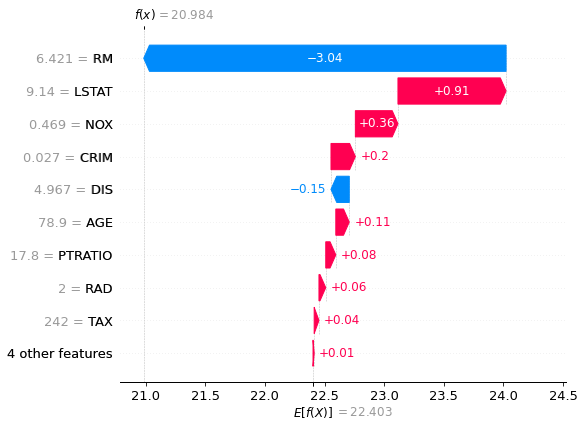

In [50]:
# visualize the first prediction's explanation using waterfall
i = 1 # смотрим влияние факторов для 2го примера
features = list(X.columns) # формируем список признаков
class ShapObject:
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        
shap_object = ShapObject(base_values = explainer.expected_value[0],
                         values = shap_values[i,:],
                         feature_names = features,
                         data = X[features].iloc[i,:])

shap.waterfall_plot(shap_object)

Этот график Обьясняет движущие силы конкретного прогноза:

По оси абсцисс отложено значение SHAP (или логарифмическое отношение вероятностей изменения цены). В самом низу E [f (x)] = -22,403 указывает исходное логарифмическое отношение шансов изменения цены. Точное соотношение между общим отношением шансов и вероятностью равно log (p / (1-p)), где p - вероятность.

Ось Y - это названия функций, представленных стрелками, вместе с их соответствующими значениями.

Влияние каждой отдельной функции (менее значимые функции объединяются в одну группу) представлено стрелками, которые перемещают логарифмическое отношение шансов влево и вправо, начиная с базового значения.

Красные стрелки увеличивают логарифмическое отношение вероятностей, а синие стрелки уменьшают логарифмическое отношение вероятностей.

---

Приведенный выше пример приведен только для одного случая.

Если мы возьмем много пояснений Force plots, повернем их на 90 градусов, а затем сложим их по горизонтали, мы сможем увидеть объяснения для всего набора данных (в notebook этот график является интерактивным):

In [16]:
# load JS visualization code to notebook
shap.initjs()
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

**Summary plot**

Сводный график с plot_type = 'bar' даст нам график важности переменной.

Функции с высокой предсказательной способностью показаны вверху, а с низкой предсказательной силой - внизу.

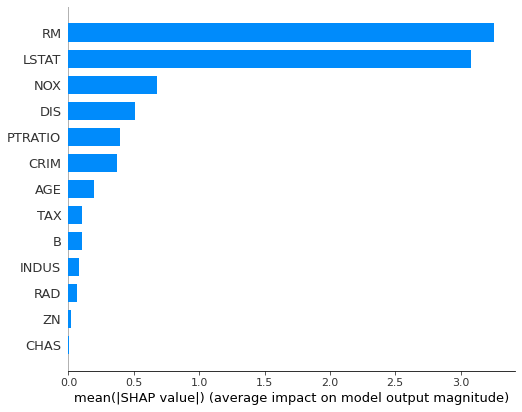

In [54]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

Здесь мы только что рассмотрели алгоритм TreeExplainer для интерпретации модели.

Вы можете изучить остальные алгоритмы - DeepExplainer, kernelExplainer, LinearExplainer и GradientExplainer.

## 2.2 NLP: Пример абстрактного обобщения текста (потребуется время)

В этом примере интерпретируется модель генерации объяснений для предварительно обученной модели для составления краткого резюме статьи.

Используется датасет Extreme Summarization (XSum)(https://huggingface.co/sshleifer/distilbart-xsum-12-6)

In [ ]:
!pip install datasets
clear_output()

In [ ]:
from datasets import load_dataset
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-xsum-12-6")
model =  AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-6")#.cuda() # если мы не используем ускоритель GPU, то .cuda() нужно убрать
# помним, что .cuda() нужно убрать, если Вы не используете аппаратный ускоритель
 
dataset = load_dataset('xsum',split='train') # загружаем датасет
s = dataset['document'][0:1]                 # slice inputs from dataset to run model inference on
explainer = shap.Explainer(model,tokenizer)  # create an explainer object
shap_values = explainer(s)                   # Compute shap values
clear_output()

In [ ]:
shap.plots.text(shap_values)                 # Visualize shap explanations

## 2.3 Image examples

### LIME
[Local Interpretable Model-Agnostic Explanations (LIME): An Introduction](https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/)

[Using Lime with Pytorch](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images%20-%20Pytorch.ipynb)


<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/7_Google_Inception_neural_network.png" alt="alttext"/>

Двавайте разберемся, как работает такое эффектное представление областей, по которым нейронная сеть осуществляет предсказание класса.

На рисунке ниже показан пример того, как LIME работает для классификации изображений.

Представьте, что мы хотим объяснить классификатор, который предсказывает, насколько вероятно, что изображение содержит древесную лягушку.

Мы берем изображение слева и делим его на интерпретируемые компоненты (смежные суперпиксели).

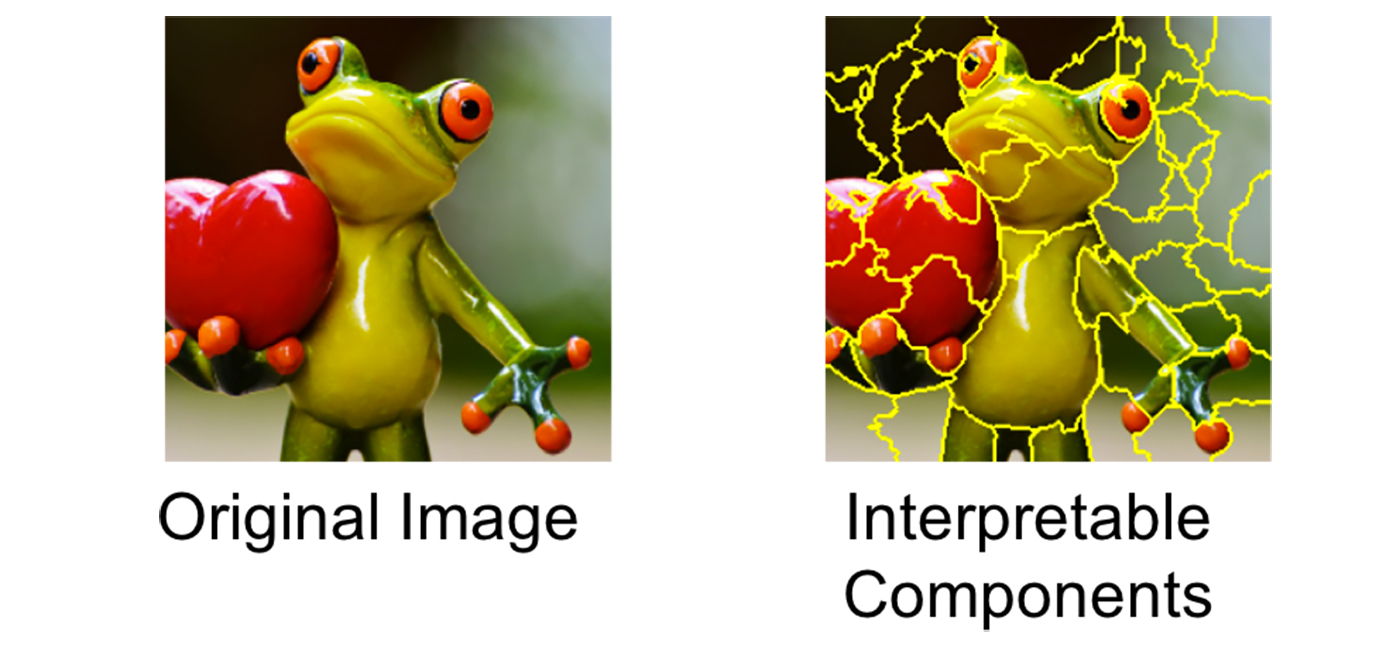

Далее, мы отключаем некоторые из интерпретируемых компонентов.

Для каждой такой картинки мы получаем вероятность того, что на изображении есть древесная лягушка, согласно модели.

Затем мы изучаем простую (линейную) модель на этом наборе данных, которая имеет локальный вес и анализируем ошибки в измененных экземплярах, которые больше похожи на исходное изображение.

В конце концов, мы представляем суперпиксели с наивысшими положительными весами в качестве объяснения, убирая все остальное.

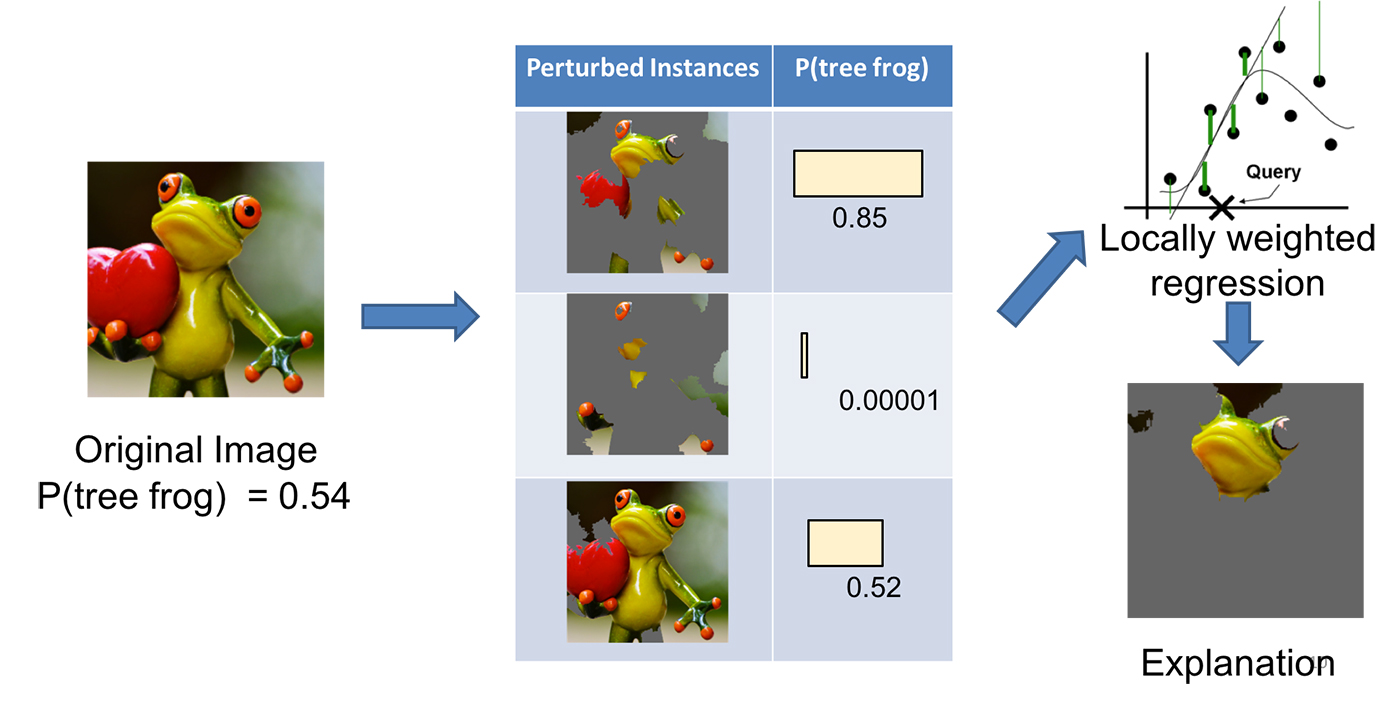



Давайте объясним нейронную сеть Google Inception. Посмотрим, почему ее классификатор предсказывает «древесную лягушку» как наиболее вероятный класс, за которым следуют «бильярдный стол» и «воздушный шар» с более низкими вероятностями.

Мы видим, что классификатор в первую очередь фокусируется на морде лягушки как на объяснении предсказанного класса.

Это также проливает свет на то, почему «бильярдный стол» имеет ненулевую вероятность: руки и глаза лягушки напоминают бильярдные шары, особенно на зеленом фоне. Точно так же сердце похоже на красный воздушный шар.

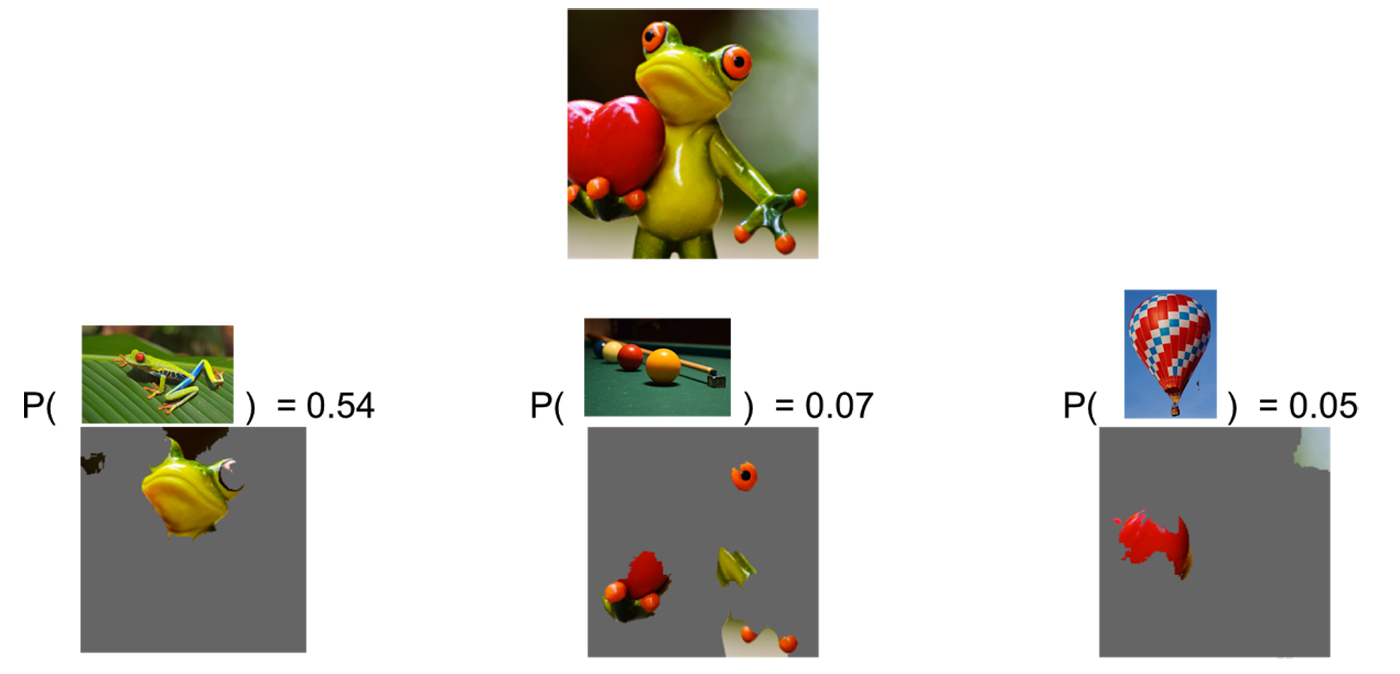

In [68]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
#import numpy as np
impo rt os, json

#import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

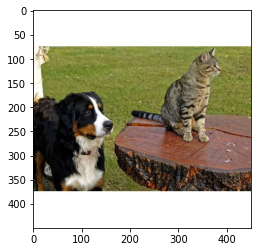

In [69]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 
        
img = get_image('/content/dogs.png')
plt.imshow(img)

Теперь нам нужно преобразовать это изображение в тензор Pytorch, а также его нормализовать для использорвания в нашей предварительно обученной модели.

In [70]:
# resize and take the center part of image to what our model expects
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])       
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize])    
    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)


Загрузим предобученную модель Resnet50, доступную в Pytorch и классы изобрражений из ImageNet.

In [108]:
model = models.resnet50(pretrained=True)
#model = models.resnet152(pretrained=True)

idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath('/content/imagenet_class_index.json'), 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}

Получим предикт. А после этого полученные нами прогнозы - логиты, пропустим это через softmax, чтобы получить вероятности и метки классов для 5 лучших прогнозов.

In [72]:
img_t = get_input_tensors(img)
model.eval()
logits = model(img_t)

probs = F.softmax(logits, dim=1)
probs5 = probs.topk(5)
tuple((p,c, idx2label[c]) for p, c in zip(probs5[0][0].detach().numpy(), probs5[1][0].detach().numpy()))

((0.44375744, 239, 'Bernese_mountain_dog'),
 (0.15447801, 281, 'tabby'),
 (0.12387303, 240, 'Appenzeller'),
 (0.0654045, 282, 'tiger_cat'),
 (0.05305515, 241, 'EntleBucher'))

Lime производит массив изображений из исходного входного изображения с помощью алгоритма пертубации.

Таким образом, нам нужно предоставить две вещи:
1. исходное изображение в виде массива numpy
2. функция классификации, которая будет принимать массив искаженных изображений в качестве входных данных и генерировать вероятности для каждого класса для каждого изображения в качестве выходных.

Для Pytorch сначала нам нужно определить два отдельных преобразования:
1. взять изображение PIL, изменить его размер и обрезать
2. взять обрезанное изображение с измененным размером и применить нормализацию.

In [73]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)])    
    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize])    
    return transf    

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [74]:
#test_pred = batch_predict([pill_transf(img)])
#test_pred.squeeze().argmax()

Применим LIME

In [75]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000) # number of images that will be sent to classification function

Воспользуемся маской на изображении и посмотрим области, которые дают лучший прогноз.

Обозначим Зеленым - область наивысшего прогноза и оранжевым - области, которые меньше всего соответствуют нашему прогнозу.

Интересно, что именно нос влияет на отнесение к классу собаки в данном примере

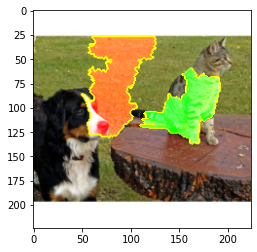

In [81]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=3, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

В то время как большинство методов, описанных в первом сообщении блога, являются глобальными методами, LIME - это метод, имеющий локальную область применения.

Таким образом, LIME позволяет нам объяснить конкретные прогнозы любого классификатора.

Структура LIME является гибкой в ​​том смысле, что любую интерпретируемую модель можно использовать для объяснения прогнозов.

Кроме того, концепция интерпретируемых компонентов позволяет применять LIME для обьяснения данных большой размерности, таких как классификация изображений или текста.

### Explain ResNet50 on ImageNet multi-class output using SHAP Partition Explainer

[Explain ResNet50 on ImageNet multi-class output using SHAP Partition Explainer](https://github.com/slundberg/shap/blob/master/notebooks/image_examples/image_classification/Image%20Multi%20Class.ipynb)

In [82]:
#!pip install opencv-python
#!conda install opencv
#clear_output()

In [83]:
#import json
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [91]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

In [92]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [105]:
# python function to get model output; replace this function with your own model function. 
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image. 
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker 
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=300, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [00:19,  6.43s/it]


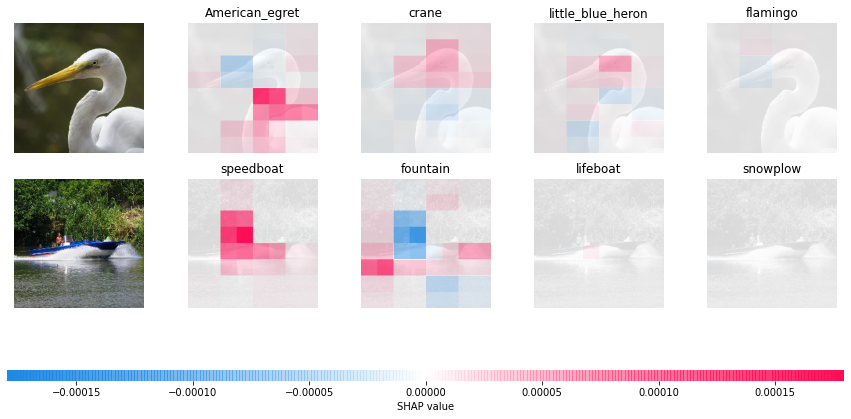

In [106]:
# output with shap values
shap.image_plot(shap_values)

Интерпретация объяснения вывода SHAP:

В первом примере данное изображение птицы классифицируется как американская цапля, а следующие вероятные классы - это журавль, цапля и фламинго. «Шишка» на шее птицы, по которой она классифицируется, как американская цапля против журавля, цапли или фламинго. Вы можете увидеть область шеи птицы, выделенную красным суперпикселем.

Во втором примере именно форма лодки позволяет классифицировать ее как быстроходный катер, а не как фонтан, спасательную шлюпку или снегоочиститель (выделено красным суперпикселями).

В наборе ImageNet есть множество изображений и Вы сможете самостоятельно поэкспериментировать, меняя номера изображений в коде: shap_values = explainer(X[1:10]... и упрапвля]я качеством обучения с помощью ..max_evals=1000, batch_size=50..

#  Bonus 1: Visualizing the Loss Landscape of Neural Nets

[Git](https://github.com/tomgoldstein/loss-landscape)

<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/8_model.jpg" alt="alttext" width=300/>


<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/9_resnet56_noshort_small.jpg" alt="alttext" width=300/>


# Bonus 2: Визуализация методов оптимизации нейронных сетей

[Методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/)


<img src="http://edunet.kea.su/repo/src/L10_Explainability/img/10_Hills_and_Canyon.png" alt="alttext" width=600/>


# 3. Список литературы

### Статьи

[How to Interpret Machine Learning Models with SHAP](https://www.youtube.com/watch?v=ylytZegK--I)

[Бесплатный курс от Kaggle: Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)

[EXPLAINABLE AI IN CREDIT RISK MANAGEMENT](https://arxiv.org/pdf/2103.00949v1.pdf)

[Predicting Driver Fatigue in Automated Driving with Explainability](https://arxiv.org/pdf/2103.02162v1.pdf)

[Fooling LIME and SHAP: Adversarial Attacks on Post hoc Explanation Methods](https://arxiv.org/pdf/1911.02508v2.pdf)

### SHAP
[Welcome to the SHAP documentation](https://shap.readthedocs.io/en/stable/index.html)

[Git](https://github.com/slundberg/shap)

[A Unified Approach to Interpreting Model Predictions](https://arxiv.org/pdf/1705.07874v2.pdf)

[SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html)

### LIME

[“Why Should I Trust You?” Explaining the Predictions of Any Classifier](https://arxiv.org/pdf/1602.04938.pdf)

[What does LIME really see in images?](https://arxiv.org/pdf/2102.06307v1.pdf)

[Git](https://github.com/marcotcr/lime)

### BORUTA
[Feature Selection with the Boruta Package](https://www.jstatsoft.org/index.php/jss/article/view/v036i11/v36i11.pdf)

# 4. Заключение:
---
* В ходе урока мы убкдились в важнности интерпретации работы моделей Искусственного Интеллекта.
* Рассмотрели основные библиотеки, которые используются для интерпретирования: SHAP и LIME. А также библиотеку BORUTA, окторая позволяет проводить анализ влияния признаков датасета на качество обучения. И дает рекомендации по исключению тех, которые влияют на результата отрицательно.
* Рассмотрели применение бибилиотек на примерах:
    - Табличные данные
    - NLP (машинный перевод текста, создание резюме статьи и классификации текстов)
    - CV

Пренебрежение обьяснением того, почему модель дала тот или иной результат, ведет к недоверию не только к самой модели, но и к конкретным прогнозам. А, следовательно, является существенным препятствием для дальнейшего введения Вашей идеи в production.

**Помните об этом!**